In [1]:
from preprocessing import *
from modeling import *

C:\Users\Edith.Zeng\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Modeling (split data into training and testing)

In [2]:
stable_list = get_stable_dealers()

order = combine_masterSKU(get_orders(stable_list, end_date='2018-05-31'))
train, test = split_datasets(order, predict=False, 
                             train_start='2014-01-01', train_end='2017-05-31',
                             test_start='2017-06-01', test_end='2018-07-31')

customer_dim = get_customer_dim(train, stable_list)
customer_features = cluster_dealers(train, customer_dim, stable_list)

1587 stable dealers
reading order table from ORDERFCT
765955 records

Forecasting 1587 stable dealers and 18 masterSKUs:
['Tundra 105-350' 'Tundra 35' 'Roadie 20' 'Tundra 45' 'Tundra 75'
 'Tundra 65' 'Tank 45-85' 'R20 Tumbler' 'R30 Tumbler' 'Hopper2.0 30'
 'R Colsters' 'R10 Lowball' 'Flip 12' 'R18 Bottle' 'R36 Bottle'
 'R26 Bottle' 'Flip 18' 'Flip 8']
Training and testing data date range: 2014-01-01 00:00:00 to 2018-06-14 00:00:00

training data date range: 2014-01-01 00:00:00 to 2017-05-31 00:00:00
training: 74.71%
testing data date range: 2017-06-01 00:00:00 to 2018-06-14 00:00:00
job started: 2018-08-16 14:50:42.094546
94.518%
job finish time: 2018-08-16 14:55:22.092993


In [3]:
train = aggregate_data(train, customer_features)

adding month and year columns
adding new product label
adding price change info
adding customer cluster
converting categorical values to numerical
calculating monthly sum order quantity per customer cluster (response vector Y)
job start time: 2018-08-16 15:05:24.131750
99.959%
job finish time: 2018-08-16 18:49:17.116477


In [4]:
test = aggregate_data(test, customer_features)

adding month and year columns
adding new product label
adding price change info
adding customer cluster
converting categorical values to numerical
calculating monthly sum order quantity per customer cluster (response vector Y)
job start time: 2018-08-16 18:51:12.438281
99.628%
job finish time: 2018-08-16 19:31:53.585757


In [9]:
%store train
%store test

Stored 'train' (DataFrame)
Stored 'test' (DataFrame)


In [19]:
X_train, X_test, Y_train, Y_test = split_train_test(train, test)

training: 74.71%
features: ['ProductCategory', 'MasterSKU', 'month', 'new_product', 'price_change', 'cluster']



        Ordinary Least Square Regression, Box-Cox transformation: True
        Training RMSE: 0.5466904725670225
        Training Adjusted R2: -16.71249203491214
        Training SMAPE: 7.896979450197413%

Test RMSE: 0.7303221425404672, test SMAPE: 8.985533287603467%


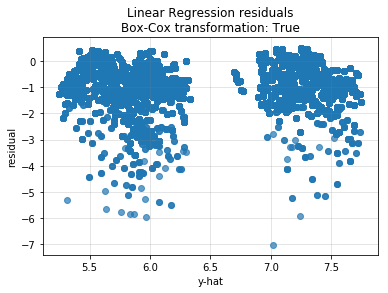

In [22]:
ols_model = ols(X_train, X_test, Y_train, Y_test)


        Polynomial Linear Regression, Box-Cox transformation: True
        Training RMSE: 137017235399.74898
        Training Adjusted R2: -3.3344381463002568e+22
        Training SMAPE: 22.74472313342346%

Test RMSE: 0.6939734363754883, test SMAPE: 8.714499928365234%


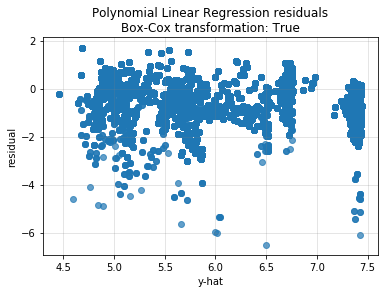

In [23]:
quadratic_ols = polynomial_ols(X_train, X_test, Y_train, Y_test,d=2)


        Polynomial Linear Regression, Box-Cox transformation: True
        Training RMSE: 13330114460.05084
        Training Adjusted R2: -9.738394608261328e+19
        Training SMAPE: 23.879290691145457%

Test RMSE: 3219668725.5990257, test SMAPE: 23.778019064968074%


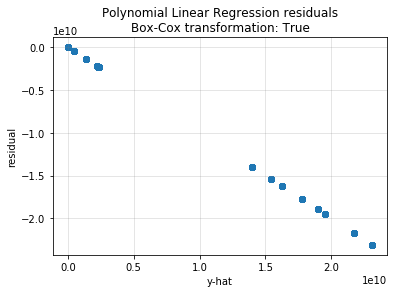

In [25]:
cubic_ols = polynomial_ols(X_train, X_test, Y_train, Y_test, d=3, plot=True)   # plot=False disables image output


        Polynomial Linear Regression, Box-Cox transformation: True
        Training RMSE: 924198625.160325
        Training Adjusted R2: -5.401570630287811e+17
        Training SMAPE: 16.65820281707187%

Test RMSE: 0.9682570851216259, test SMAPE: 11.066525840502415%


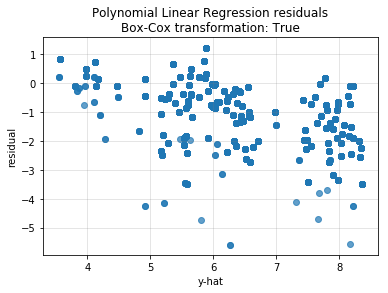

In [14]:
quartic_ols = polynomial_ols(X_train, X_test, Y_train, Y_test, d=4, plot=True)    # plot=False disables image output


 Test RMSE: 0.6199758950450657, test SMAPE: 7.6867272513961025%


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

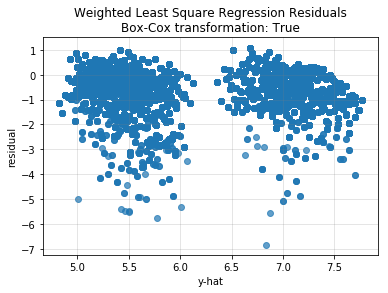

In [26]:
wls(X_train, X_test, Y_train, Y_test)

training: 14.94%
features: ['ProductCategory', 'MasterSKU', 'month', 'new_product', 'price_change', 'cluster']
Job start time: 2018-08-14 15:43:49.474794
18.571%
Job finish time: 2018-08-14 16:13:52.126013
training: 74.71%
features: ['ProductCategory', 'MasterSKU', 'month', 'new_product', 'price_change', 'cluster']

 Test RMSE: 0.7906402418786334, test SMAPE: 10.090623478506956%


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=4, p=2,
          weights='uniform')

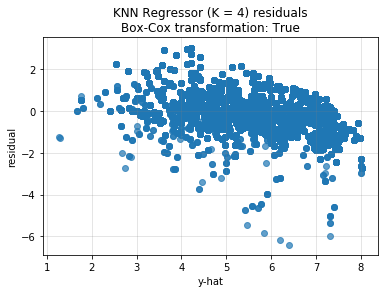

In [27]:
X_train, X_test, Y_train, Y_test = split_train_test(train, test=None, frac=0.2)
k = knn_find_k(X_train, Y_train, step=2, return_best_k=True)
X_train, X_test, Y_train, Y_test = split_train_test(train, test, frac=1)
knn(X_train, X_test, Y_train, Y_test, k)

training: 14.94%
features: ['ProductCategory', 'MasterSKU', 'month', 'new_product', 'price_change', 'cluster']
training: 74.71%
features: ['ProductCategory', 'MasterSKU', 'month', 'new_product', 'price_change', 'cluster']

            Random Forest, Box-Cox transformation: True
            Training RMSE: 0.5229975446056343
            Training OOB: 0.901697710174001
            Training SMAPE :9.942754897599617%
        

Test RMSE: 0.7135836255693818, test SMAPE: 9.105264391616409%


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

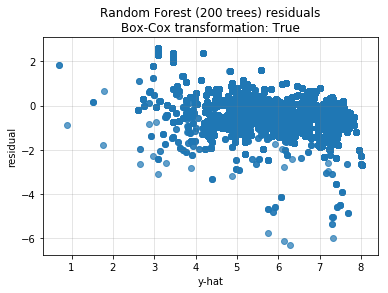

In [29]:
X_train, X_test, Y_train, Y_test = split_train_test(train, test, frac=0.2)
tree = find_optimal_tree(X_train, Y_train)
X_train, X_test, Y_train, Y_test = split_train_test(train, test, frac=1)
random_forest(X_train, X_test, Y_train, Y_test, tree=tree)

In [30]:
ols_rmse, ols_smape = ols_by_masterSKU(train, test)
quadratic_ols_rmse, quadratic_ols_smape = polynomial_ols_by_masterSKU(train, test, d=2)
cubic_ols_rmse, cubic_ols_smape = polynomial_ols_by_masterSKU(train, test, d=3)
quartic_ols_rmse, quartic_ols_smape = polynomial_ols_by_masterSKU(train, test, d=4)
wls_rmse, wls_smape = wls_by_masterSKU(train, test)

training: 74.71%
features: ['ProductCategory', 'MasterSKU', 'month', 'new_product', 'price_change', 'cluster']
94.444%training: 74.71%
features: ['ProductCategory', 'MasterSKU', 'month', 'new_product', 'price_change', 'cluster']
94.444%training: 74.71%
features: ['ProductCategory', 'MasterSKU', 'month', 'new_product', 'price_change', 'cluster']
94.444%training: 74.71%
features: ['ProductCategory', 'MasterSKU', 'month', 'new_product', 'price_change', 'cluster']
94.444%training: 74.71%
features: ['ProductCategory', 'MasterSKU', 'month', 'new_product', 'price_change', 'cluster']
94.444%

## Monthly per masterSKU SMAPE (12 x 18 tables for each model)

In [2]:
%store -r train
%store -r test
test = test.loc[test.Requested_Date <= pd.Timestamp(2018,5,31)]

In [3]:
def monthly_smape_linear_regression(model_name, train, test):
    
    """ monthly_smape = {1: {'Roadie20': 12%, 'rambler 20': 15% ...}, 2: {'Tundra 45': 12%, 'flip 12': 10% ...} """
    
    monthly_smape = {}
    
    for month in range(1,13):
        
        current_month_test = test.loc[test['month'] == month]
        if len(current_month_test) == 0:
            raise ValueError("month: ".format(month))
        if model_name == 'ols':
            smape, Y_pred = ols_monthly_smape_by_masterSKU(train, current_month_test)
        elif model_name == 'wls':
            smape, Y_pred = wls_monthly_smape_by_masterSKU(train, current_month_test)
        else:
            raise ValueError("model_name='ols' or 'wls'")
        monthly_smape[month] = smape
        
        sys.stdout.write("\r"+"{0:.2%}".format(month/12))
        sys.stdout.flush()
        
    return monthly_smape



def monthly_smape_knn_rf(model_name, train, test):
    
    """ monthly_smape = {1: {'Roadie20': 12%, 'rambler 20': 15% ...}, 2: {'Tundra 45': 12%, 'flip 12': 10% ...} """
    
    X_train, Y_train = split_train_test(train, test=None, frac=0.2)
    if model_name == 'knn':
        k = knn_find_k(X_train, Y_train)
    elif model_name == 'rf':
        tree = find_optimal_tree(X_train, Y_train)
    else:
        raise ValueError("model_name='knn' or 'rf'")
        
    X_train, X_test, Y_train, Y_test = split_train_test(train, test, frac=1)
    monthly_smape = {}

    for month in range(1,13):
        
        current_month_test = test.loc[test['month'] == month]
        if len(current_month_test) == 0:
            raise ValueError("month: ".format(month))
        if k:
            smape, Y_pred = knn_monthly_smape_by_masterSKU(train, current_month_test, k, decimal=True)
        if tree:
            smape, Y_pred = random_forest_by_masterSKU(train, current_month_test, tree, decimal=True)
        monthly_smape[month] = smape
        
        sys.stdout.write("\r"+"{0:.2%}".format(month/12))
        sys.stdout.flush()
        
    return monthly_smape

In [ ]:
wls_monthly_smape_decimal = monthly_smape_linear_regression('wls', train, test)

In [5]:
wls_monthly_smape_decimal

{1: {'Hopper 2.0 and Hopper 30': 0.12685576175830443,
  'R colsters': 0.06440363295918146,
  'R10 lowball': 0.05070630340656941,
  'R18 bottle': 0.09460847920792399,
  'R20 tumbler': 0.07799724890272093,
  'R26 bottle': 0.11921269305860188,
  'R30 tumbler': 0.05215519221996152,
  'R36 bottle': 0.12054788073244511,
  'Roadie 20': 0.03356073434902533,
  'Tank 45-85': 0.5312808667664282,
  'Tundra 105-350': 0.20680856586654744,
  'Tundra 35': 0.07263787447484063,
  'Tundra 45': 0.03353374672754636,
  'Tundra 65': 0.028036604213303288,
  'Tundra 75': 0.2199163541970674,
  'flip 12': 0.11480628427534632,
  'flip 18': 0.12739912486796295,
  'flip 8': 0.10738185665614283},
 2: {'Hopper 2.0 and Hopper 30': 0.10178710177021316,
  'R colsters': 0.1034507643791806,
  'R10 lowball': 0.07887568865895868,
  'R18 bottle': 0.13519260189502397,
  'R20 tumbler': 0.05988066117486215,
  'R26 bottle': 0.14509569888830925,
  'R30 tumbler': 0.04186537032982232,
  'R36 bottle': 0.13445230187980264,
  'Roadie 

In [5]:
ols_monthly_smape_decimal = monthly_smape_linear_regression('ols', train, test)
%store ols_monthly_smape_decimal

training: 98.04%
features: ['ProductCategory', 'MasterSKU', 'month', 'new_product', 'price_change', 'cluster']
8.33%4%training: 98.26%
features: ['ProductCategory', 'MasterSKU', 'month', 'new_product', 'price_change', 'cluster']
16.67%%training: 98.42%
features: ['ProductCategory', 'MasterSKU', 'month', 'new_product', 'price_change', 'cluster']
25.00%%training: 96.12%
features: ['ProductCategory', 'MasterSKU', 'month', 'new_product', 'price_change', 'cluster']
33.33%%training: 97.06%
features: ['ProductCategory', 'MasterSKU', 'month', 'new_product', 'price_change', 'cluster']
41.67%%training: 96.72%
features: ['ProductCategory', 'MasterSKU', 'month', 'new_product', 'price_change', 'cluster']
50.00%%training: 97.75%
features: ['ProductCategory', 'MasterSKU', 'month', 'new_product', 'price_change', 'cluster']
58.33%%training: 96.57%
features: ['ProductCategory', 'MasterSKU', 'month', 'new_product', 'price_change', 'cluster']
66.67%%training: 96.52%
features: ['ProductCategory', 'MasterSK

In [6]:
ols_monthly_smape_decimal

{1: {'Hopper 2.0 and Hopper 30': 0.2526393389940862,
  'R colsters': 0.1388863399658452,
  'R10 lowball': 0.12349659744820743,
  'R18 bottle': 0.16318660856138592,
  'R20 tumbler': 0.025709424955838566,
  'R26 bottle': 0.1903675890609564,
  'R30 tumbler': 0.03504283630861752,
  'R36 bottle': 0.17888106851719016,
  'Roadie 20': 0.08431391197891173,
  'Tank 45-85': 0.6173361397739214,
  'Tundra 105-350': 0.29757675898238817,
  'Tundra 35': 0.16354275070418609,
  'Tundra 45': 0.1236781712709096,
  'Tundra 65': 0.11822089972793122,
  'Tundra 75': 0.3073811788400134,
  'flip 12': 0.24131384088891644,
  'flip 18': 0.254175889894482,
  'flip 8': 0.23128266102683676},
 2: {'Hopper 2.0 and Hopper 30': 0.21692498152163694,
  'R colsters': 0.1716617756420927,
  'R10 lowball': 0.1464507407363721,
  'R18 bottle': 0.20103954721105033,
  'R20 tumbler': 0.027406326010952258,
  'R26 bottle': 0.20928128796803164,
  'R30 tumbler': 0.033734489840772486,
  'R36 bottle': 0.19684328585469862,
  'Roadie 20': 

In [7]:
ols_monthly_smape_decimal[1]

{'Hopper 2.0 and Hopper 30': 0.2526393389940862,
 'R colsters': 0.1388863399658452,
 'R10 lowball': 0.12349659744820743,
 'R18 bottle': 0.16318660856138592,
 'R20 tumbler': 0.025709424955838566,
 'R26 bottle': 0.1903675890609564,
 'R30 tumbler': 0.03504283630861752,
 'R36 bottle': 0.17888106851719016,
 'Roadie 20': 0.08431391197891173,
 'Tank 45-85': 0.6173361397739214,
 'Tundra 105-350': 0.29757675898238817,
 'Tundra 35': 0.16354275070418609,
 'Tundra 45': 0.1236781712709096,
 'Tundra 65': 0.11822089972793122,
 'Tundra 75': 0.3073811788400134,
 'flip 12': 0.24131384088891644,
 'flip 18': 0.254175889894482,
 'flip 8': 0.23128266102683676}

In [19]:
list(ols_monthly_smape_decimal[12].values())

[0.2680500992991815,
 0.26101037880382355,
 0.22941849657407584,
 0.24791350726166672,
 0.16833299919448744,
 0.16925347638061616,
 0.2131198944502884,
 0.019383557432778323,
 0.15606410582136,
 0.0283745626273148,
 0.17170804719599,
 0.11268627866757668,
 0.6198004917194376,
 0.2900995413359866,
 0.22242302759271165,
 0.13769119454054105,
 0.15912151616057854,
 0.3063161139519296]

In [ ]:
knn_monthly_smape = monthly_smape_knn_rf('knn', train, test)
%store knn_monthly_smape
knn_monthly_smape

Job start time: 2018-08-17 15:06:33.484679
1.429%

In [ ]:
# change the index in dict from 1 (January) to 12 (December) 
# then copy and paste result to the corresponding Excel sheet on Box - Data Science Internship - Final Presentation - Model Performance.xlsx
# after pasting all 12 months in Model Performance.xlsx -> Monthly - ML - KNN, select all the numbers, 
# Find & Select - > Replace -> Replace tab -> Find what: , Replace with: [1 space]
# then select all numbers and format as percentage with 4 floating point precision

list(knn_monthly_smape[1].values())
# list(knn_monthly_smape[2].values())
# list(knn_monthly_smape[12].values())

In [ ]:
rf_monthly_smape = monthly_smape_knn_rf('rf', train, test)

In [ ]:
# do the same thing as above for random forest
list(rf_monthly_smape[1].values())

## training = 1/1/2014 - 5/31/2018, testing = 6/1/2018 - 7/31/2018

In [2]:
stable_list = get_stable_dealers()
order = combine_masterSKU(get_orders(stable_list, end_date='2018-08-01'))
train, test = split_datasets(order, predict=False, train_start='2014-01-01',train_end='2018-05-31',test_start='2018-06-01',test_end='2018-07-31')
customer_dim = get_customer_dim(train, stable_list)
customer_features = cluster_dealers(train, customer_dim, stable_list)

train = aggregate_data(train, customer_features)
test = aggregate_data(test, customer_features)

1587 stable dealers
reading order table from ORDERFCT
782918 records

Forecasting 1587 stable dealers and 18 masterSKUs:
['Tundra 105-350' 'Roadie 20' 'Tundra 45' 'Tundra 35' 'Tundra 75'
 'Tundra 65' 'Tank 45-85' 'R20 Tumbler' 'R30 Tumbler' 'Hopper2.0 30'
 'R Colsters' 'R10 Lowball' 'Flip 12' 'R18 Bottle' 'R36 Bottle'
 'R26 Bottle' 'Flip 8' 'Flip 18']
Training and testing data date range: 2014-01-01 00:00:00 to 2018-08-01 00:00:00

training data date range: 2014-01-01 00:00:00 to 2018-05-31 00:00:00
training: 97.83%
testing data date range: 2018-06-01 00:00:00 to 2018-07-29 00:00:00
job started: 2018-08-15 12:52:57.334424
94.518%
job finish time: 2018-08-15 12:57:28.352821
adding month and year columns
adding new product label
adding price change info
adding customer cluster
converting categorical values to numerical
calculating monthly sum order quantity per customer cluster (response vector Y)
job start time: 2018-08-15 13:02:13.938364
99.882%
job finish time: 2018-08-15 20:13:16.096

In [3]:
X_train, X_test, Y_train, Y_test = split_train_test(train, test)

training: 97.87%
features: ['ProductCategory', 'MasterSKU', 'month', 'new_product', 'price_change', 'cluster']


In [7]:
test.Requested_Date.min()

Timestamp('2018-06-01 00:00:00')

In [9]:
%store train
%store test

Stored 'train' (DataFrame)
Stored 'test' (DataFrame)


In [ ]:
%store -r train
%store -r test

In [4]:
ols_rmse, ols_smape = ols_by_masterSKU(train, test)

training: 97.87%
features: ['ProductCategory', 'MasterSKU', 'month', 'new_product', 'price_change', 'cluster']
94.444%

In [6]:
np.mean(list(ols_smape.values()))

19.540641500426357

In [7]:
np.mean(list(ols_rmse.values()))

1.2977320534074828